# Topomaps for Mixed Effects Model

In [1]:
import mne
import os.path as op
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import copy
import pandas as pd
import statsmodels.stats.multitest as mul

In [2]:
# in order to create Evoked from MEM data (regression coeff and p_value), 
#which we need for topomaps plotting we need .info attribute, which we can take from donor
donor = mne.Evoked("/home/vtretyakova/Рабочий стол/corr_with_behavior/old/combine_planar_active1_st_stim_words/030_koal_comb_planar_act1_st.fif")


    Found the data of interest:
        t =       0.00 ...    6746.67 ms (No comment)
        0 CTF compensation matrices available
        nave = 27 - aspect type = 100
No projector specified for this dataset. Please consider the method self.add_proj.


# Topomaps для выбора сенсора (построены по предварительной модели - Полной LMEM)

In [3]:
# read data, which were obtained by full LMEM (reg coef and p_value for each combined planar - 102)
df = pd.read_csv('/home/vtretyakova/Рабочий стол/corr_with_behavior/MEM_old_new_baseline/table_for_search_significant_sensor/active1_st_PreM_full_LMEM.csv')

In [4]:
reg_coeff = np.array(df['reg_coeff']).reshape(102,1)

In [5]:
#make Evoked
r_PreM = mne.EvokedArray(reg_coeff, donor.info)

In [6]:
# set the time - one point in this case
t = np.linspace(0, 0, num=1)

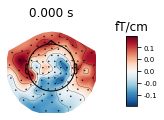

In [9]:
# plot topomap - color is regression coefficient
fig = r_PreM.plot_topomap(times = t, ch_type='planar1', scalings = 1);

# P_value

In [4]:
# function make False/True array from p_value array, we need this for mask parametr in topomap
def p_val_binary(p_val, treshold):
    #p_val =  copy.deepcopy(p_val_n)
    for raw in range(p_val.shape[0]):
        for collumn in range(p_val.shape[1]):
            if p_val[raw, collumn] < treshold:
                p_val[raw, collumn] = 1
            else:
                p_val[raw, collumn] = 0
    return p_val

In [18]:
p_val = np.array(df['p_val']).reshape(102,1)

In [19]:
binary = p_val_binary(p_val, 0.05)

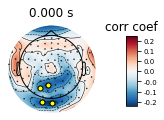

In [22]:
# yellow point it is sensors with p_val < 0
fig2 = r_sup.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'corr coef', colorbar = True, 
                       mask = np.bool_(binary), mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));

#  For FDR correction we need following functions

In [1]:
# space FDR for each time point independently
def space_fdr(p_val_n):
    print(p_val_n.shape)
    temp = copy.deepcopy(p_val_n)
    for i in range(temp.shape[1]):
        _, temp[:,i] = mul.fdrcorrection(p_val_n[:,i])
    return temp

# Full FDR -the correction is made once for the intire data array
def full_fdr(p_val_n):
    s = p_val_n.shape
    print(p_val_n.shape)
    pval = np.ravel(p_val_n)
    _, pval_fdr = mul.fdrcorrection(pval)
    pval_fdr_shape = pval_fdr.reshape(s)
    return pval_fdr_shape

# Common function for topomams plotting

In [14]:

def topomaps_for_mem(session, interval, donor):
    df = pd.read_csv('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/mem_{0}/{0}_{1}.csv'.format(session, interval))
    reg_coeff = np.array(df['reg_coeff']).reshape(102,1)
    p_val = np.array(df['p_val']).reshape(102,1)
    space_fdr_pval = space_fdr(p_val)
    full_fdr_pval = full_fdr(p_val)
    
    binary = p_val_binary(p_val, 0.05)
    binary_space_fdr = p_val_binary(space_fdr_pval, 0.05)
    binary_full_fdr = p_val_binary(full_fdr_pval, 0.05)
    t = np.linspace(0, 0, num=1)
    r = mne.EvokedArray(reg_coeff, donor.info)
    fig = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary), 
                             mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    fig1 = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary_space_fdr), 
                             mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    fig2 = r.plot_topomap(times = t, ch_type='planar1', scalings = 1, units = 'reg coef', 
                              colorbar = True, mask = np.bool_(binary_full_fdr), 
                             mask_params = dict(marker='o', markerfacecolor='yellow', markeredgecolor='k', linewidth=0, markersize=10, markeredgewidth=2));
    
    return(fig, fig1, fig2)



(102, 1)
(102, 1)


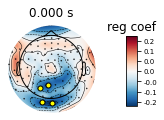

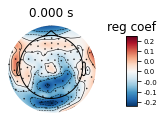

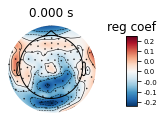

(102, 1)
(102, 1)


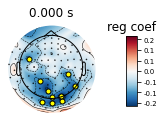

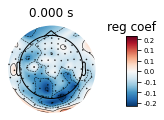

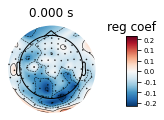

(102, 1)
(102, 1)


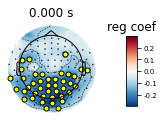

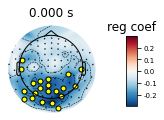

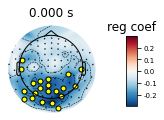

(102, 1)
(102, 1)


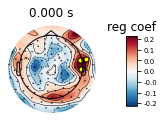

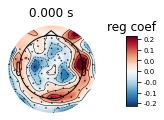

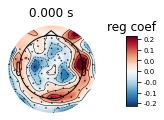

(102, 1)
(102, 1)


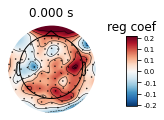

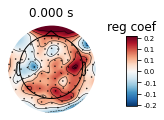

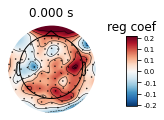

(102, 1)
(102, 1)


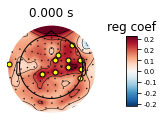

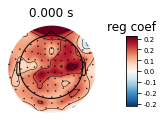

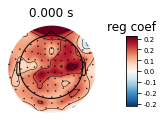

(102, 1)
(102, 1)


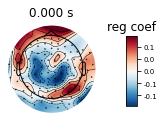

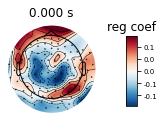

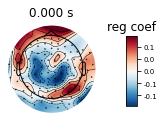

(102, 1)
(102, 1)


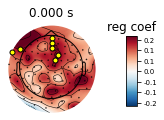

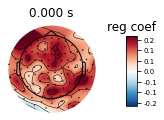

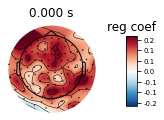

(102, 1)
(102, 1)


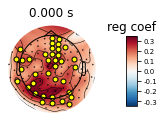

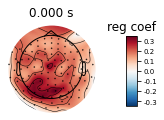

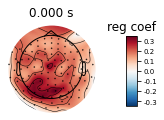

In [15]:
# plot topomaps for every condinions
intervals = ['suppression', 'rising', 'sustained']
sessions = ['active1_st', 'active2_st', 'active2_end']


for session in sessions:
    for j in intervals:
        fig, fig1, fig2 = topomaps_for_mem(session = session, interval = j, donor = donor)
        fig.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}.jpeg'.format(session, j), dpi = 300);
        fig1.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_space_fdr.jpeg'.format(session, j), dpi = 300);
        fig2.savefig('/home/vtretyakova/Desktop/corr_with_behavior/MEM_old/topomaps/{0}_{1}_full_fdr.jpeg'.format(session, j), dpi = 300);